# The model that predict titanic survivors.

In [204]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [135]:
df = pd.read_csv('train.csv')

In [136]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [137]:
#Before we dive deeper into our analysis we need to drop passengerID, Name and Ticket features because they won't be of any help 
#in predicting who dies and who survives

df = df.drop(['PassengerId','Name', 'Ticket'], axis =1)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


## Data analysis and exploration of the data.

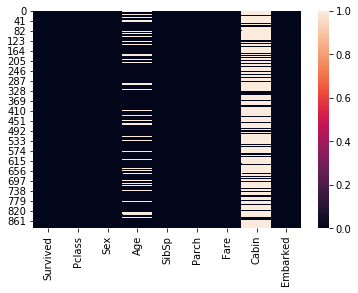

In [139]:
#Lets vidualise the null values in our data and do the counts of null values in each attributes
sns.heatmap(df.isnull(), cbar=True)

In [140]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [141]:
#The percentage of null values of sex and Cabin respectively
Age = (177/891)*100
Cabin = (687/891)*100
print(Age)
print(Cabin)

19.865319865319865
77.10437710437711


77.1 % of null in Cabin is too high we must drop this attribute.

In [142]:
df = df.drop(['Cabin'], axis =1)

In [143]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

### Replace the null values of Age by average age and Embarked by the mode

In [144]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=False)

### Lets have look at the mean, standard devioation, min and max values, and the count of each feature in the dataset

In [145]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Lets look at the correlation between the independent variables and the dependent variable

In [146]:
corr = df.corr(method='spearman')
corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.339668,-0.039109,0.088879,0.138266,0.323736
Pclass,-0.339668,1.000000,-0.308875,-0.043019,-0.022801,-0.688032
Age,-0.039109,-0.308875,1.000000,-0.147035,-0.217290,0.118847
SibSp,0.088879,-0.043019,-0.147035,1.000000,0.450014,0.447113
Parch,0.138266,-0.022801,-0.217290,0.450014,1.000000,0.410074
Fare,0.323736,-0.688032,0.118847,0.447113,0.410074,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

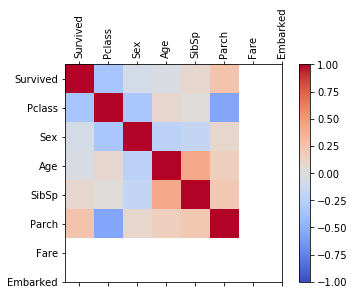

In [147]:
#Lets look at the plot
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show

### Lets have a look at our target variable, the value count of survived/died people

In [148]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

549 people died while only 342 people survived.

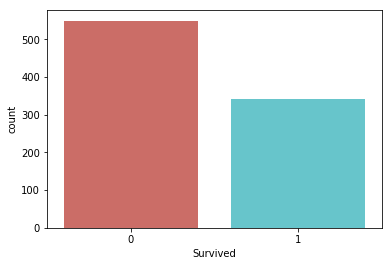

In [149]:

sns.countplot(x= 'Survived', data= df, palette = 'hls')
plt.show()

In [150]:
count_dead_people = len(df[df['Survived']==0])
count_survived_people = len(df[df['Survived']==1])
pct_of_death = count_dead_people/(count_dead_people+count_survived_people)
print("percentage of death", pct_of_death*100)
pct_of_survivors = count_survived_people/(count_survived_people+count_dead_people)
print("percentage of survivors", pct_of_survivors*100)

percentage of death 61.61616161616161
percentage of survivors 38.38383838383838


### Our classes are imbalanced, and the ratio of 0 to 1 instances is 62:38. Before we go ahead and balance the classes, let’s do some more exploration.

In [151]:
df.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.415100,0.553734,0.329690,22.117887
1,1.950292,28.549778,0.473684,0.464912,48.395408


#### Observations:

1. the average of Parch and Fare features is higher on the survivors.
2. the average of Pclass, Age and SibSp is higher on the death rate side

In [152]:
df.groupby('Sex').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,0.742038,2.159236,28.216730,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.505824,0.429809,0.235702,25.523893


In [153]:
df.groupby('Pclass').mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,37.048118,0.416667,0.356481,84.154687
2,0.472826,29.866958,0.402174,0.380435,20.662183
3,0.242363,26.403259,0.615071,0.393075,13.675550


In [154]:
df.groupby('Embarked').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,
C,0.553571,1.886905,30.562419,0.386905,0.363095,59.954144
Q,0.389610,2.909091,29.113724,0.428571,0.168831,13.276030
S,0.339009,2.346749,29.544382,0.569659,0.411765,27.243651


#### Observations:

1. in Sex attribute the are more female survivors than men.
2. in Pclass attribute Pclass =1 has the higher average of survivors than Pclass 2 and 3.
3. in Embarked attribue C has the higher average than Q and S.

# Visualizations of the features

Text(0, 0.5, 'Survivors and Dead')

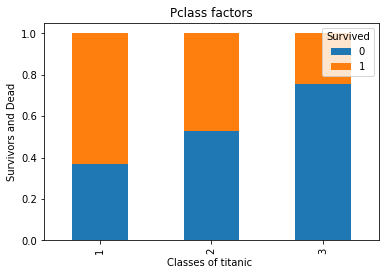

In [155]:
table=pd.crosstab(df.Pclass,df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Pclass factors')
plt.xlabel('Classes of titanic ' )
plt.ylabel('Survivors and Dead')

By looking at the picture above we can see that more died in Pclass 3 while more people survived in Pclass 1
So Pclass attribute is a strong prector.

Text(0, 0.5, 'Proportion of survivors/dead')

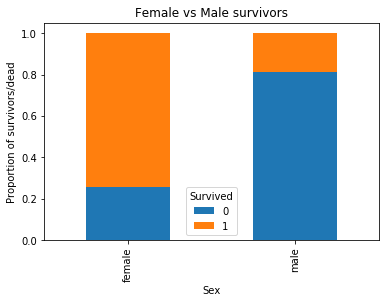

In [156]:
table=pd.crosstab(df.Sex,df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Female vs Male survivors')
plt.xlabel('Sex')
plt.ylabel('Proportion of survivors/dead')

By looking at the picture above we can see that more males died and more females survived in terms of %, Sex attribute is a strong prector.

Text(0, 0.5, 'Frequency of survivors/death')

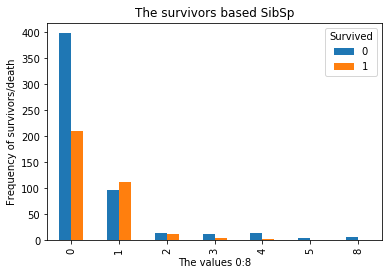

In [157]:
pd.crosstab(df.SibSp,df.Survived).plot(kind='bar')
plt.title('The survivors based SibSp')
plt.xlabel('The values 0:8')
plt.ylabel('Frequency of survivors/death')

From the above picture we can see SibSp is not be a strong predictor and not much is known about this feature perhabs we must drop it.

Text(0, 0.5, 'Frequency of survivors/death')

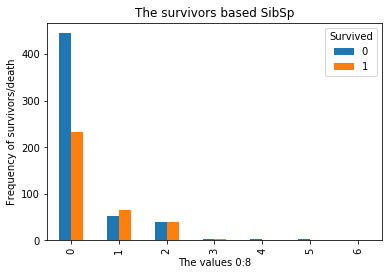

In [158]:
pd.crosstab(df.Parch,df.Survived).plot(kind='bar')
plt.title('The survivors based SibSp')
plt.xlabel('The values 0:8')
plt.ylabel('Frequency of survivors/death')

From the above picture we can see Parch is not be a strong predictor and not much is known about this feature perhabs we must drop it.

In [159]:
# we need to drop Parch and SibSp features as they are not contribute to what we wnat to achieve
df = df.drop(['Parch', 'SibSp'], axis =1)

### Lets look at the distribution of age and price ticket

Text(0, 0.5, 'Frequency of Age')

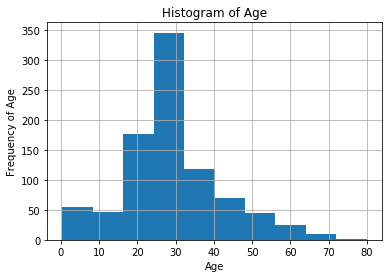

In [160]:
df.Age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency of Age')

WE see that about 350 people were between 25-30 years of age

Text(0, 0.5, 'Frequency')

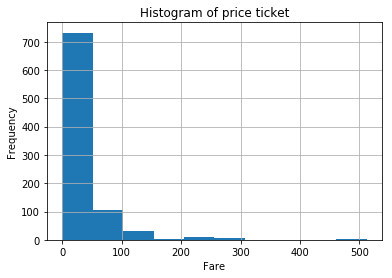

In [161]:
df.Fare.hist()
plt.title('Histogram of price ticket')
plt.xlabel('Fare')
plt.ylabel('Frequency')

In [162]:
#pd.set_option('display.max_rows',1000)
#df.Fare.value_counts(sort=True)
df.Fare.max() # The expensive ticket

512.3292

by looking at the value count of the fare about 15 people didn't pay we would have to assume that those the infants
more than 700 people paid between 0  and 50 dollars, about 100 people paid between 50 and 100 dollars, about 2 or 3 paid 500 dollars.

# Pre Processing Data

In [163]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


#### Create dummy variables

Lets create dummy variable for our catergorical features

In [164]:
for column in ['Pclass','Sex','Embarked']:
    dummies = pd.get_dummies(df[column])
    df[dummies.columns] = dummies

In [165]:
df = df.drop(columns=['Pclass','Sex','Embarked'], axis = 1)

In [166]:
df.columns

Index(['Survived', 'Age', 'Fare', 1, 2, 3, 'female', 'male', 'C', 'Q', 'S'], dtype='object')

In [167]:
df.columns = ['Survived', 'Age', 'Fare', 'Class1', 'Class2', 'Class3', 'female', 'male', 'C', 'Q', 'S']

In [168]:
df.head()

,Survived,Age,Fare,Class1,Class2,Class3,female,male,C,Q,S
0,0,22.0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,0,0,1


In [169]:
#df.Class1

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Age         891 non-null float64
Fare        891 non-null float64
Class1      891 non-null uint8
Class2      891 non-null uint8
Class3      891 non-null uint8
female      891 non-null uint8
male        891 non-null uint8
C           891 non-null uint8
Q           891 non-null uint8
S           891 non-null uint8
dtypes: float64(2), int64(1), uint8(8)
memory usage: 27.9 KB


In [171]:
## converting the data type into into integer
lst = ['female','male','Class1','Class2','Class3','C','Q','S']
for i in lst:
    df[i] = df[i].astype('float64')


# Build classification models

In [172]:
#Hide warnings
import warnings
warnings.filterwarnings("ignore")

In [173]:
X = np.array(df.ix[:, df.columns != 'Survived'])
y = np.array(df.ix[:, df.columns == 'Survived'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (891, 10)
Shape of y: (891, 1)


Lets split the data into train and test sets

In [174]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [175]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (623, 10)
Number transactions y_train dataset:  (623, 1)
Number transactions X_test dataset:  (268, 10)
Number transactions y_test dataset:  (268, 1)


Balancing the classes

In [176]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': [242]
Before OverSampling, counts of label '0': [381] 

After OverSampling, the shape of train_X: (762, 10)
After OverSampling, the shape of train_y: (762,) 

After OverSampling, counts of label '1': 381
After OverSampling, counts of label '0': 381


In [177]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   12.2s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:   12.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [178]:
clf.best_params_

{'C': 1.0}

In [179]:
lr1 = LogisticRegression(C=4,penalty='l1', verbose=5)
lr1.fit(X_train_res, y_train_res.ravel())

[LibLinear]

LogisticRegression(C=4, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=5, warm_start=False)

In [180]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')
    
    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the train dataset: 77.27272727272727%


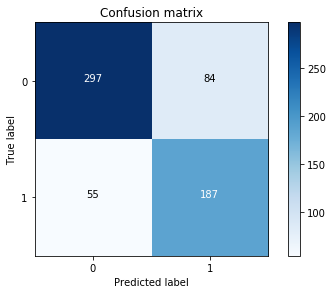

In [181]:
y_train_pre = lr1.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

Recall metric in the testing dataset: 81.0%


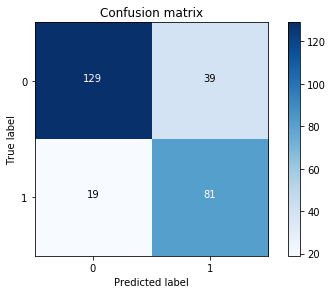

In [182]:
y_pre = lr1.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pre)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [183]:
tmp = lr1.fit(X_train_res, y_train_res.ravel())

[LibLinear]

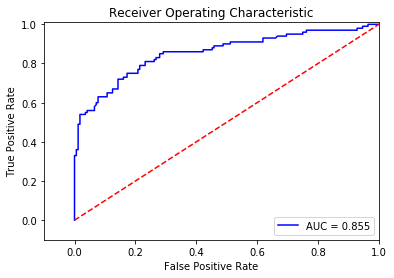

In [184]:
y_pred_sample_score = tmp.decision_function(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [185]:
roc_auc

0.855

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

# Using the back elimination method.

In [186]:
df.head()

,Survived,Age,Fare,Class1,Class2,Class3,female,male,C,Q,S
0,0,22.0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1,38.0,71.2833,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,26.0,7.9250,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1,35.0,53.1000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,35.0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [187]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.glm(formula = 'Survived ~ Age+Fare+Class1+Class2+Class3+female+male+C+Q+S',
                data = df, 
                family=sm.families.Binomial())
model = model.fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      883
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -398.89
Date:                Sun, 19 May 2019   Deviance:                       797.77
Time:                        19:22:22   Pearson chi2:                     936.
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5981      0.134      4.463      0.000       0.335       0.861
Age           -0.0332      0.007     -4.455      0.0

### Remove g feature because it has the highest p-value

In [188]:
#The Fare feature removed
model = smf.glm(formula = 'Survived ~ Age+Class1+Class2+Class3+female+male+C+Q+S',
                data = df, 
                family=sm.families.Binomial())
model = model.fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      884
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -398.89
Date:                Sun, 19 May 2019   Deviance:                       797.78
Time:                        19:23:34   Pearson chi2:                     936.
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6014      0.124      4.848      0.000       0.358       0.845
Age           -0.0333      0.007     -4.489      0.0

In [131]:
#S feature removed
model = smf.glm(formula = 'Survived ~ Age+Class1+Class2+Class3+female+male+C+Q',
                data = df, 
                family=sm.families.Binomial())
model = model.fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      884
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -398.89
Date:                Sun, 19 May 2019   Deviance:                       797.78
Time:                        19:19:04   Pearson chi2:                     936.
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5103      0.138      3.691      0.000       0.239       0.781
Age           -0.0333      0.007     -4.489      0.0

In [189]:
#Qfeture removed
model = smf.glm(formula = 'Survived ~ Age+Class1+Class2+Class3+female+male+C',
                data = df, 
                family=sm.families.Binomial())
model = model.fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      885
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -400.40
Date:                Sun, 19 May 2019   Deviance:                       800.81
Time:                        19:25:08   Pearson chi2:                     919.
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5253      0.138      3.797      0.000       0.254       0.796
Age           -0.0324      0.007     -4.381      0.0

In [190]:
# Class2 feature removed
model = smf.glm(formula = 'Survived ~ Age+Class1+Class3+female+male+C',
                data = df, 
                family=sm.families.Binomial())
model = model.fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      885
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -400.40
Date:                Sun, 19 May 2019   Deviance:                       800.81
Time:                        19:25:43   Pearson chi2:                     919.
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6978      0.190      3.674      0.000       0.326       1.070
Age           -0.0324      0.007     -4.381      0.0

All p-values are below 0.05 then we can fit the model

In [194]:
df.columns

Index(['Survived', 'Age', 'Fare', 'Class1', 'Class2', 'Class3', 'female',
       'male', 'C', 'Q', 'S'],
      dtype='object')

In [197]:
#the dataframe
df =df[['Survived', 'Age', 'Class1', 'Class3', 'female','male', 'C']]

In [198]:
df.head(1)

,Survived,Age,Class1,Class3,female,male,C
0,0,22.0,0.0,1.0,0.0,1.0,0.0


# Fiting Regression Model.

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [200]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


In [201]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[139  29]
 [ 27  73]]


In [202]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       168
           1       0.72      0.73      0.72       100

   micro avg       0.79      0.79      0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



# Conclusion:

1. The model perfomance is 0.79 accurate and the precison is 0.84 for people that dies, 0.72 for survivors and F1-score is 0.83 for zero and 0.70 for one which is also the measure of the test accuracy
2. From the confusion matrix we predicted 212 correct out of the total of 268 from the test data.
3. 'Survived', 'Age', 'Class1', 'Class3', 'female','male', 'C' features were the strongest predictors
4. We used the seven features for this model to get the 0.79 accuracy.